In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data = pd.read_csv('recipe_site_traffic_2212.csv')

In [58]:
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [59]:
data['recipe'].duplicated().sum()

0

In [60]:
data = data.drop('recipe', axis = 1)

In [61]:
data.duplicated().sum()

23

In [62]:
data[data.duplicated()]

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
89,NaN,NaN,NaN,NaN,Pork,6,High
209,NaN,NaN,NaN,NaN,Dessert,2,High
351,NaN,NaN,NaN,NaN,Potato,4,High
354,NaN,NaN,NaN,NaN,Pork,4,High
376,NaN,NaN,NaN,NaN,Pork,6,High
388,NaN,NaN,NaN,NaN,Lunch/Snacks,4,High
427,NaN,NaN,NaN,NaN,Vegetable,4,High
455,NaN,NaN,NaN,NaN,Pork,6,High
538,NaN,NaN,NaN,NaN,Vegetable,4,High
545,NaN,NaN,NaN,NaN,Chicken Breast,6,High


In [63]:
data.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,NaN,NaN,NaN,NaN,Pork,6,High
1,35.48,38.56,0.66,0.92,Potato,4,High
2,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,97.03,30.56,38.63,0.02,Beverages,4,High
4,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    object 
 6   high_traffic  574 non-null    object 
dtypes: float64(4), object(3)
memory usage: 51.9+ KB


In [65]:
data.describe(include = 'all')

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
count,895.000000,895.000000,895.000000,895.000000,947,947,574
unique,NaN,NaN,NaN,NaN,11,6,1
top,NaN,NaN,NaN,NaN,Breakfast,4,High
freq,NaN,NaN,NaN,NaN,106,389,574
mean,435.939196,35.069676,9.046547,24.149296,NaN,NaN,NaN
std,453.020997,43.949032,14.679176,36.369739,NaN,NaN,NaN
min,0.140000,0.030000,0.010000,0.000000,NaN,NaN,NaN
25%,110.430000,8.375000,1.690000,3.195000,NaN,NaN,NaN
50%,288.550000,21.480000,4.550000,10.800000,NaN,NaN,NaN
75%,597.650000,44.965000,9.800000,30.200000,NaN,NaN,NaN


In [66]:
data['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [67]:
data['servings'].replace('4 as a snack' , '1',inplace = True)
data['servings'].replace('6 as a snack' , '1',inplace = True)
data['servings'] = data['servings'].astype('int64')

In [68]:
print(data['category'].unique())

['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']


In [69]:
data['high_traffic'] = data['high_traffic'].fillna(0)
data['high_traffic'] = data['high_traffic'].replace('High', 1)
data.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,NaN,NaN,NaN,NaN,Pork,6,1
1,35.48,38.56,0.66,0.92,Potato,4,1
2,914.28,42.68,3.09,2.88,Breakfast,1,0
3,97.03,30.56,38.63,0.02,Beverages,4,1
4,27.05,1.85,0.80,0.53,Beverages,4,0


<AxesSubplot: xlabel='category', ylabel='count'>

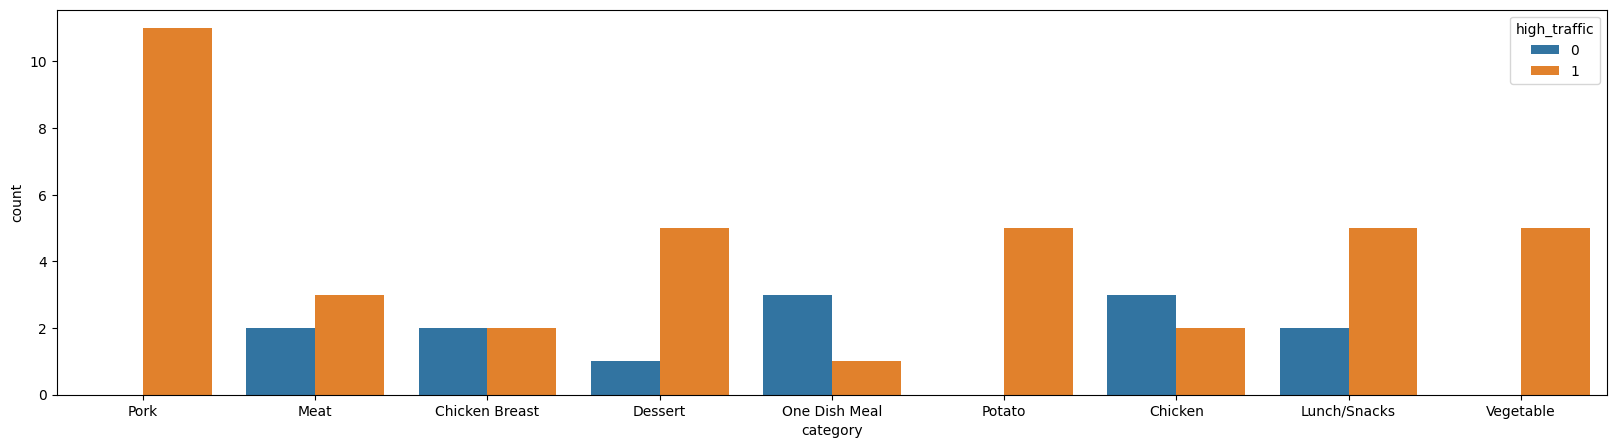

In [70]:
data_null = data[data.isna().any(axis = 1)]
plt.figure(figsize = (20,5))
sns.countplot(data = data_null, x = 'category',hue = 'high_traffic')

In [71]:
data.describe(exclude = 'number')

,category
count,947
unique,11
top,Breakfast
freq,106


In [72]:
data['high_traffic'] = data['high_traffic'].fillna(0)
data['high_traffic'] = data['high_traffic'].replace('High', 1)
data.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,NaN,NaN,NaN,NaN,Pork,6,1
1,35.48,38.56,0.66,0.92,Potato,4,1
2,914.28,42.68,3.09,2.88,Breakfast,1,0
3,97.03,30.56,38.63,0.02,Beverages,4,1
4,27.05,1.85,0.80,0.53,Beverages,4,0


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    int64  
 6   high_traffic  947 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 51.9+ KB


In [74]:
data_null = data.isna().any(axis = 1)
data.isna().sum()

calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

In [75]:
data['servings'] = data['servings'].astype('int64')
data['cal_per_serving'] = data['calories']/data['servings']
data['carb_per_serving'] = data['carbohydrate']/data['servings']
data['sugar_per_serving'] = data['sugar']/data['servings']
data['protein_per_serving'] = data['protein']/data['servings']

data.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic,cal_per_serving,carb_per_serving,sugar_per_serving,protein_per_serving
0,NaN,NaN,NaN,NaN,Pork,6,1,NaN,NaN,NaN,NaN
1,35.48,38.56,0.66,0.92,Potato,4,1,8.8700,9.6400,0.1650,0.2300
2,914.28,42.68,3.09,2.88,Breakfast,1,0,914.2800,42.6800,3.0900,2.8800
3,97.03,30.56,38.63,0.02,Beverages,4,1,24.2575,7.6400,9.6575,0.0050
4,27.05,1.85,0.80,0.53,Beverages,4,0,6.7625,0.4625,0.2000,0.1325


In [76]:
data_null = data[data.isna().any(axis = 1)]
data_null.head()
type(data)

pandas.core.frame.DataFrame

<AxesSubplot: xlabel='category', ylabel='count'>

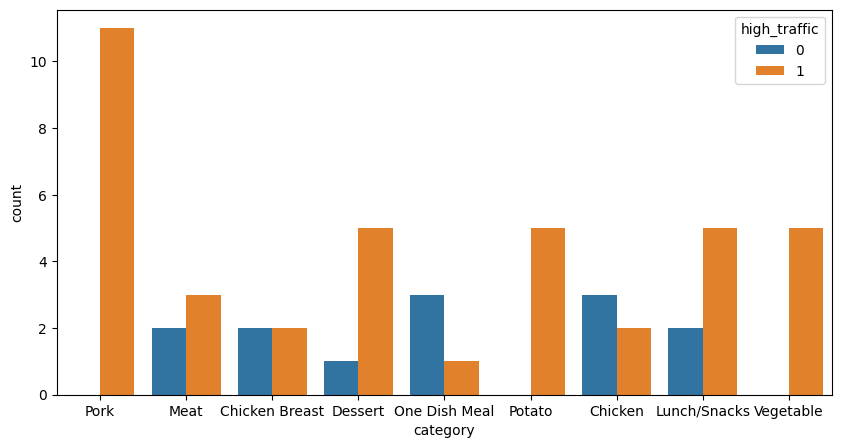

In [77]:
plt.figure(figsize = (10,5))
sns.countplot(data = data_null, x = 'category',hue = 'high_traffic')

In [78]:
imputer_table = data.groupby(['category','high_traffic'])[['cal_per_serving','carb_per_serving','sugar_per_serving','protein_per_serving']].agg('median').reset_index().copy()
#imputer_table = data.dropna()
# imputer_table.reset_index()
imputer_table

# k = np.array(imputer_table.loc[ (imputer_table['category'] == 'Chicken')&(imputer_table['high_traffic'] == 1)][['cal_per_serving','carb_per_serving','sugar_per_serving','protein_per_serving']]).tolist()[0]
# k


,category,high_traffic,cal_per_serving,carb_per_serving,sugar_per_serving,protein_per_serving
0,Beverages,0,43.681667,3.925000,2.690000,0.145000
1,Beverages,1,24.257500,5.098333,2.480000,0.060000
2,Breakfast,0,64.957500,11.875000,1.630000,4.270000
3,Breakfast,1,56.560000,8.270000,2.170000,4.210000
4,Chicken,0,181.617500,7.056250,1.472500,11.352500
5,Chicken,1,93.830000,4.355000,1.060000,6.921667
6,Chicken Breast,0,83.042500,5.744167,0.891667,10.676250
7,Chicken Breast,1,189.326250,7.176250,1.153750,11.363750
8,Dessert,0,60.620000,9.760000,6.916667,1.686667
9,Dessert,1,99.465000,12.481667,6.806250,1.282500


In [79]:
data_imputed_1 = data.copy()
print(data_imputed_1.head())
def null_imputer(item):
    return np.array(imputer_table.loc[ (imputer_table['category'] == item['category'])&(imputer_table['high_traffic'] == item['high_traffic'])][['cal_per_serving','carb_per_serving','sugar_per_serving','protein_per_serving']]).tolist()[0] * np.array(item['servings'])
for index, row in data_null.iterrows():
    if row.isna().any():
        #data_imputed.loc[ (data_imputed['category'] == row['category'])&(data_imputed['high_traffic'] == row['high_traffic']),['cal_per_serving','carb_per_serving','sugar_per_serving','protein_per_serving']] = null_imputer(row)
        data_imputed_1.loc[ index ,['calories','carbohydrate','sugar','protein']] = null_imputer(row) 
        #data_imputed.loc[ index ,['calories','carbohydrate','sugar','protein']] = null_imputer(row)*row['servings']
        #print(null_imputer(item['category'].values,item['high_traffic'].values))
    
print(data_imputed_1.head())

   calories  carbohydrate  sugar  protein   category  servings  high_traffic  \
0       NaN           NaN    NaN      NaN       Pork         6             1   
1     35.48         38.56   0.66     0.92     Potato         4             1   
2    914.28         42.68   3.09     2.88  Breakfast         1             0   
3     97.03         30.56  38.63     0.02  Beverages         4             1   
4     27.05          1.85   0.80     0.53  Beverages         4             0   

   cal_per_serving  carb_per_serving  sugar_per_serving  protein_per_serving  
0              NaN               NaN                NaN                  NaN  
1           8.8700            9.6400             0.1650               0.2300  
2         914.2800           42.6800             3.0900               2.8800  
3          24.2575            7.6400             9.6575               0.0050  
4           6.7625            0.4625             0.2000               0.1325  
   calories  carbohydrate    sugar  protein  

In [80]:
data_imputed = data.copy()
print(data_imputed.head())
def null_imputer(item):
    return np.array(imputer_table.loc[ (imputer_table['category'] == item['category'])&(imputer_table['high_traffic'] == item['high_traffic'])][['cal_per_serving','carb_per_serving','sugar_per_serving','protein_per_serving']]).tolist()[0]
for index, row in data_null.iterrows():
    if row.isna().any():
        #data_imputed.loc[ (data_imputed['category'] == row['category'])&(data_imputed['high_traffic'] == row['high_traffic']),['cal_per_serving','carb_per_serving','sugar_per_serving','protein_per_serving']] = null_imputer(row)
        data_imputed.loc[ index ,['cal_per_serving','carb_per_serving','sugar_per_serving','protein_per_serving']] = null_imputer(row)
        #data_imputed.loc[ index ,['calories','carbohydrate','sugar','protein']] = null_imputer(row)*row['servings']
        data_imputed['calories']= data_imputed['cal_per_serving']*data_imputed['servings']
        data_imputed['carbohydrate'] = data_imputed['carb_per_serving']*data_imputed['servings']
        data_imputed['sugar'] = data_imputed['sugar_per_serving']*data_imputed['servings']
        data_imputed['protein'] = data_imputed['protein_per_serving']*data_imputed['servings']
        #print(null_imputer(item['category'].values,item['high_traffic'].values))
    
print(data_imputed.head())

   calories  carbohydrate  sugar  protein   category  servings  high_traffic  \
0       NaN           NaN    NaN      NaN       Pork         6             1   
1     35.48         38.56   0.66     0.92     Potato         4             1   
2    914.28         42.68   3.09     2.88  Breakfast         1             0   
3     97.03         30.56  38.63     0.02  Beverages         4             1   
4     27.05          1.85   0.80     0.53  Beverages         4             0   

   cal_per_serving  carb_per_serving  sugar_per_serving  protein_per_serving  
0              NaN               NaN                NaN                  NaN  
1           8.8700            9.6400             0.1650               0.2300  
2         914.2800           42.6800             3.0900               2.8800  
3          24.2575            7.6400             9.6575               0.0050  
4           6.7625            0.4625             0.2000               0.1325  
   calories  carbohydrate    sugar  protein  

In [81]:
# data_imputed = data.dropna()
# data_imputed
# #     print(item['category'].values())
data_imputed['category'].replace('Chicken Breast' , 'Chicken',inplace = True)

#data_imputed[['calories','carbohydrate','sugar','protein']] = data_imputed[['calories','carbohydrate','sugar','protein']].astype('int64')

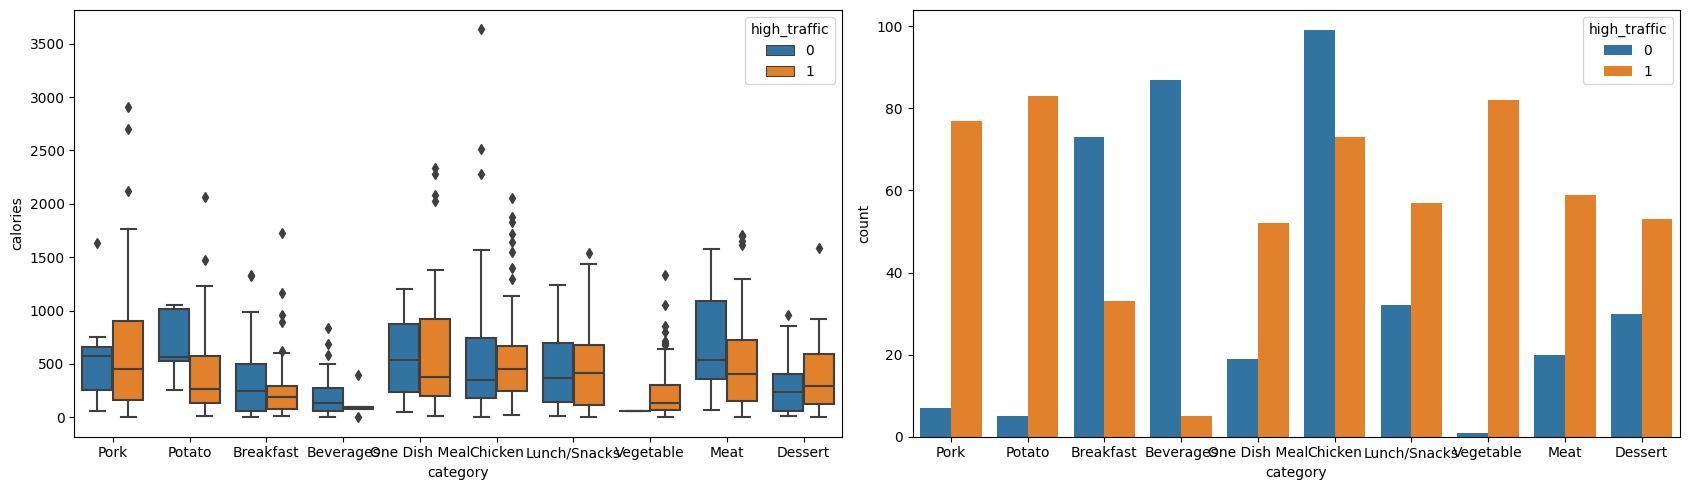

In [82]:
fig, ax = plt.subplots(ncols = 2, figsize = (17,5))
ax0 = sns.boxplot(data = data_imputed, y = 'calories', x = 'category', hue = 'high_traffic' , ax= ax[0])
ax1 = sns.countplot(data = data_imputed, x = 'category', hue = 'high_traffic' , ax= ax[1])
plt.tight_layout()
plt.show()

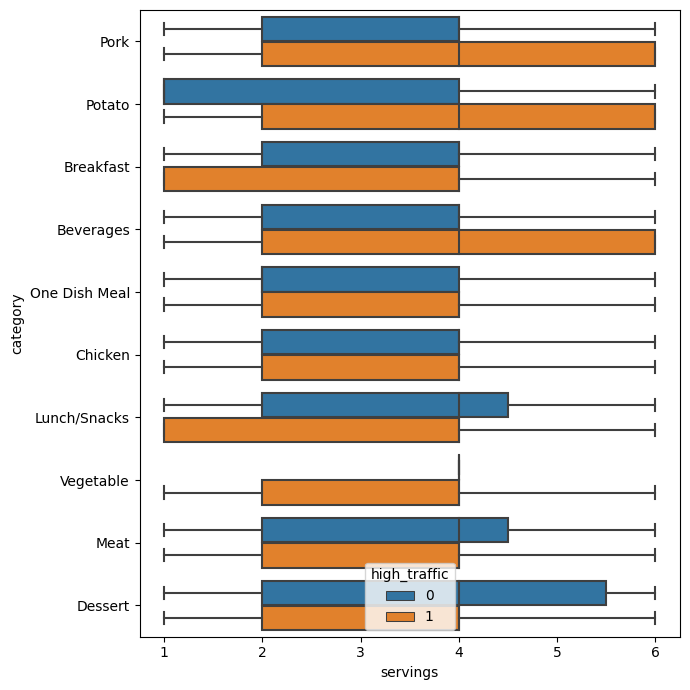

In [83]:
fig, ax = plt.subplots( figsize = (7,7))
ax0 = sns.boxplot(data = data_imputed, x = 'servings', y = 'category', hue = 'high_traffic' )
#ax1 = sns.countplot(data = data_imputed, x = 'category', hue = 'high_traffic' , ax= ax[1])
plt.tight_layout()
plt.show()

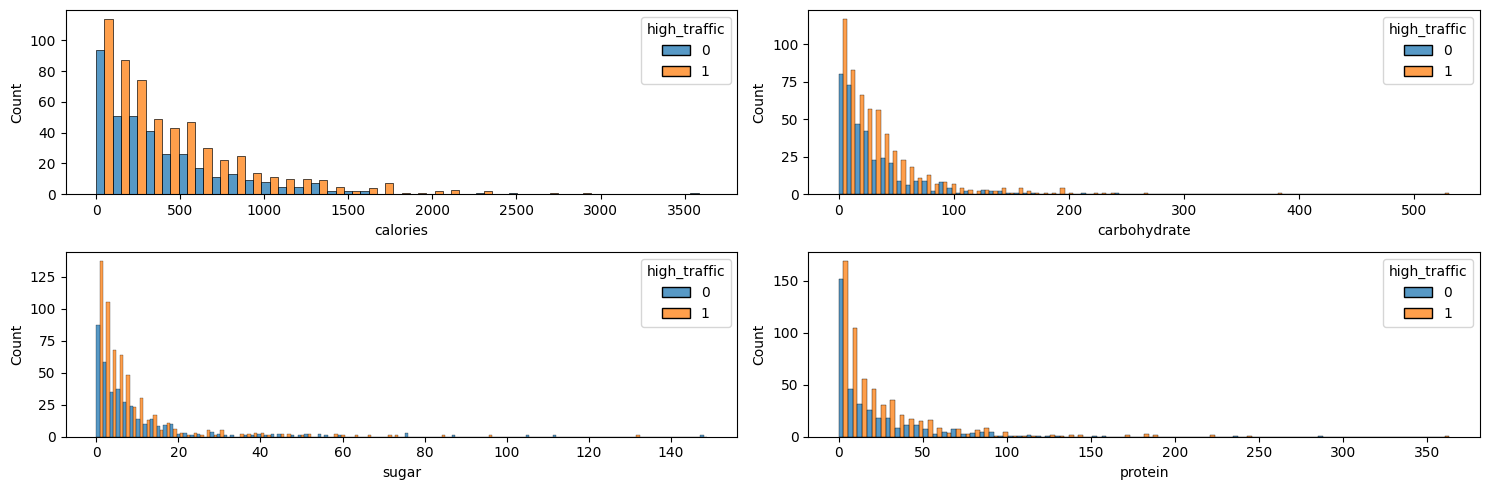

In [84]:
fig, ax = plt.subplots(nrows = 2, ncols = 2,figsize = (15,5))
ax0 = sns.histplot(data = data_imputed, x = 'calories', hue = 'high_traffic', multiple = 'dodge' , ax = ax[0][0])
ax1 = sns.histplot(data = data_imputed, x = 'carbohydrate', hue = 'high_traffic', multiple = 'dodge' , ax = ax[0,1])
ax2 = sns.histplot(data = data_imputed, x = 'sugar', hue = 'high_traffic', multiple = 'dodge' , ax = ax[1][0])
ax3 = sns.histplot(data = data_imputed, x = 'protein', hue = 'high_traffic', multiple = 'dodge' , ax = ax[1][1])
fig.tight_layout()
plt.show()

<AxesSubplot: xlabel='Count', ylabel='category'>

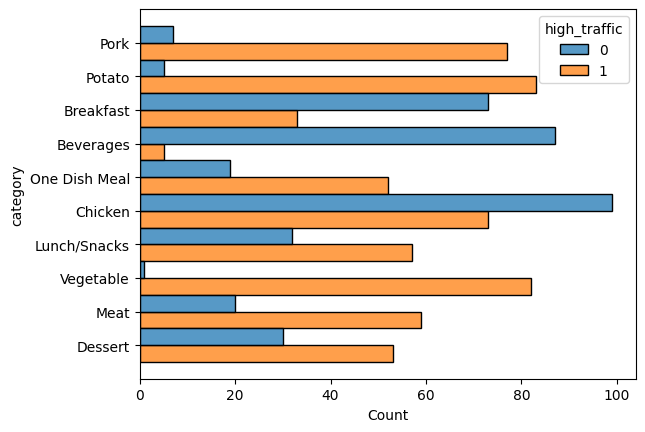

In [85]:
sns.histplot(data = data_imputed,  y ='category', hue = 'high_traffic' , multiple = 'dodge')

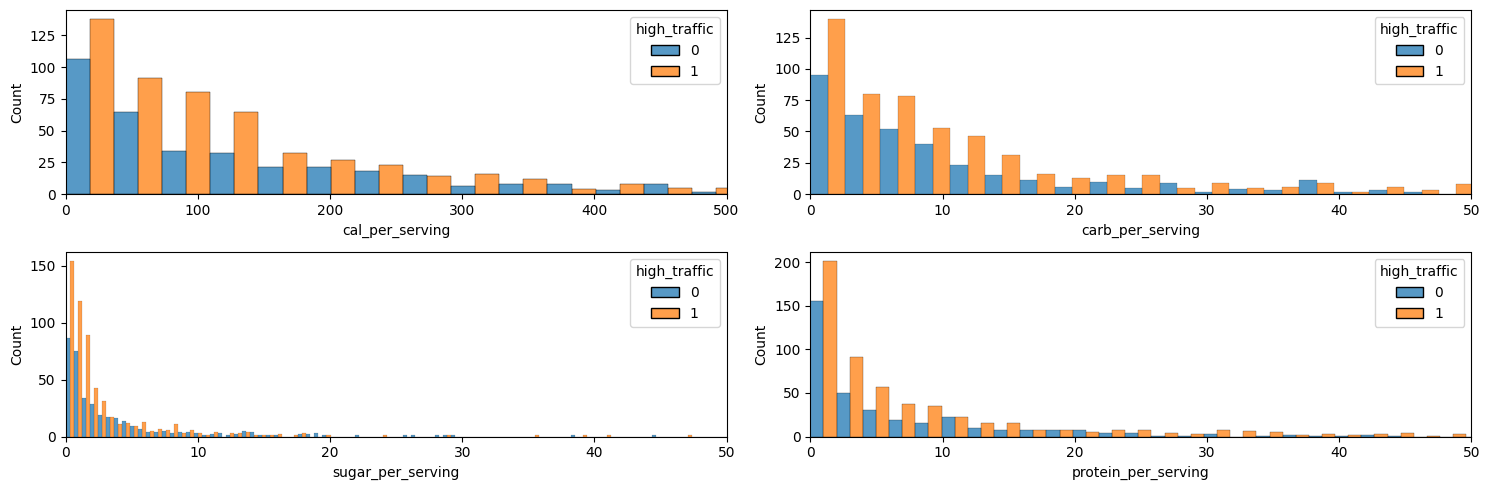

In [86]:
fig, ax = plt.subplots(nrows = 2, ncols = 2,figsize = (15,5))
ax0 = sns.histplot(data = data_imputed, x = 'cal_per_serving', hue = 'high_traffic', multiple = 'dodge' , ax = ax[0][0])
ax0.set_xlim(0,500)
ax1 = sns.histplot(data = data_imputed, x = 'carb_per_serving', hue = 'high_traffic', multiple = 'dodge' , ax = ax[0,1])
ax1.set_xlim(0,50)
ax2 = sns.histplot(data = data_imputed, x = 'sugar_per_serving', hue = 'high_traffic', multiple = 'dodge' , ax = ax[1][0])
ax2.set_xlim(0,50)
ax3 = sns.histplot(data = data_imputed, x = 'protein_per_serving', hue = 'high_traffic', multiple = 'dodge' , ax = ax[1][1])
ax3.set_xlim(0,50)
fig.tight_layout()
plt.show()

In [87]:
# bins = [-1, 50,100,250,4000]
# data_imputed['cal_bin'] = pd.cut(data_imputed['cal_per_serving'], bins,labels = [1,2,3,4])

# bins = [-1, 25, 500]
# data_imputed['carb_bin'] = pd.cut(data_imputed['carb_per_serving'], bins,labels = [1,2])
# bins = [-1,10, 20, 150]
# data_imputed['sug_bin'] = pd.cut(data_imputed['sugar_per_serving'], bins,labels = [1,2,3])
# bins = [-1, 5, 25, 200]
# data_imputed['prot_bin'] = pd.cut(data_imputed['protein_per_serving'], bins,labels = [1,2,3])




# data_imputed['carbs_ratio'] = data_imputed['carbohydrate']/(data_imputed['carbohydrate']+data_imputed['sugar']+data_imputed['protein'])
# data_imputed['sugar_ratio'] = data_imputed['sugar']/(data_imputed['carbohydrate']+data_imputed['sugar']+data_imputed['protein'])
# data_imputed['protein_ratio'] = data_imputed['protein']/(data_imputed['carbohydrate']+data_imputed['sugar']+data_imputed['protein'])

In [88]:
# fig, ax = plt.subplots(nrows = 2, ncols = 2,figsize = (15,5))
# ax0 = sns.histplot(data = data_imputed, x = 'carbs_ratio', hue = 'high_traffic', multiple = 'dodge' , ax = ax[0][0])
# ax1 = sns.histplot(data = data_imputed, x = 'sugar_ratio', hue = 'high_traffic', multiple = 'dodge' , ax = ax[0,1])
# ax2 = sns.histplot(data = data_imputed, x = 'protein_ratio', hue = 'high_traffic', multiple = 'dodge' , ax = ax[1][0])
# fig.tight_layout()
# plt.show()

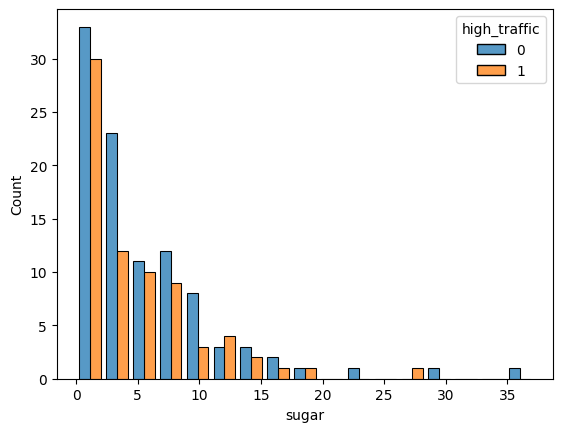

In [89]:
chicken = data_imputed[ data_imputed['category'] == 'Chicken' ]
x = sns.histplot(data = chicken, x = 'sugar',hue = 'high_traffic', multiple = 'dodge', shrink = 0.8)

(0.0, 50.0)

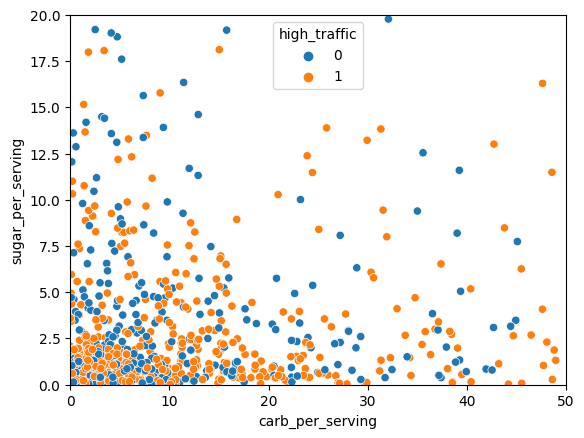

In [90]:
x =sns.scatterplot(data = data_imputed, x = 'carb_per_serving', y = 'sugar_per_serving', hue = 'high_traffic')
x.set_ylim(0,20)
x.set_xlim(0,50)

<AxesSubplot: xlabel='servings', ylabel='count'>

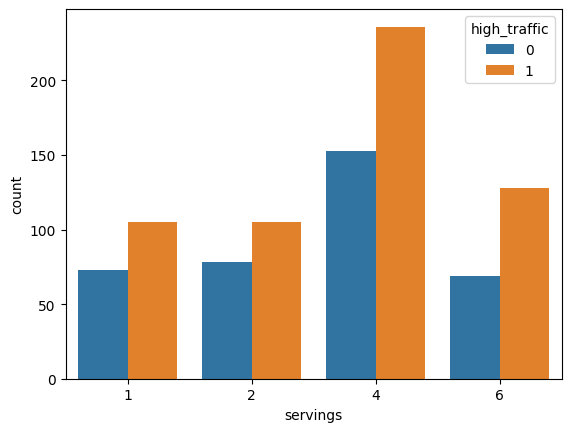

In [91]:
sns.countplot(data = data_imputed, x = 'servings' , hue = 'high_traffic')

In [92]:
data_imputed.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic,cal_per_serving,carb_per_serving,sugar_per_serving,protein_per_serving
0,853.125,34.135,9.8775,53.70,Pork,6,1,142.1875,5.689167,1.64625,8.9500
1,35.480,38.560,0.6600,0.92,Potato,4,1,8.8700,9.640000,0.16500,0.2300
2,914.280,42.680,3.0900,2.88,Breakfast,1,0,914.2800,42.680000,3.09000,2.8800
3,97.030,30.560,38.6300,0.02,Beverages,4,1,24.2575,7.640000,9.65750,0.0050
4,27.050,1.850,0.8000,0.53,Beverages,4,0,6.7625,0.462500,0.20000,0.1325


In [93]:
#data_imputed = data_imputed.drop(columns = ['calories','carbohydrate','sugar','protein','carbs_ratio','sugar_ratio','protein_ratio'])
#data_imputed = data_imputed.drop(columns = ['cal_per_serving','carb_per_serving','sugar_per_serving','protein_per_serving','carbs_ratio','sugar_ratio','protein_ratio'])
data_imputed = data_imputed.drop(columns = ['cal_per_serving','carb_per_serving','sugar_per_serving','protein_per_serving'])
# data_imputed = data_imputed.drop(columns = ['calories','carbohydrate','sugar','protein','cal_per_serving','carb_per_serving','sugar_per_serving','protein_per_serving','carbs_ratio','sugar_ratio','protein_ratio'])
data_imputed['sugar_percent'] = data_imputed['sugar']/(data_imputed['carbohydrate']+data_imputed['sugar'])
# data_imputed.head()

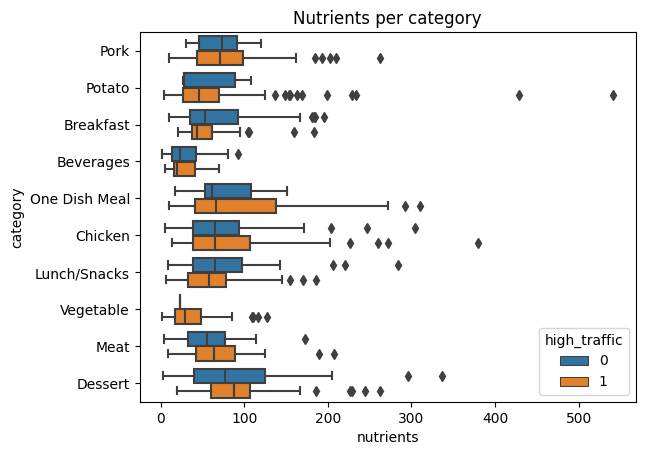

In [96]:
data_imputed['nutrients'] = (data_imputed['protein']+data_imputed['sugar']+data_imputed['carbohydrate'])
ax0 = sns.boxplot(data = data_imputed, x = 'nutrients', y = 'category', hue = 'high_traffic')
ax0.set_title('Nutrients per category')
#plt.xlim(0,100)
plt.show()

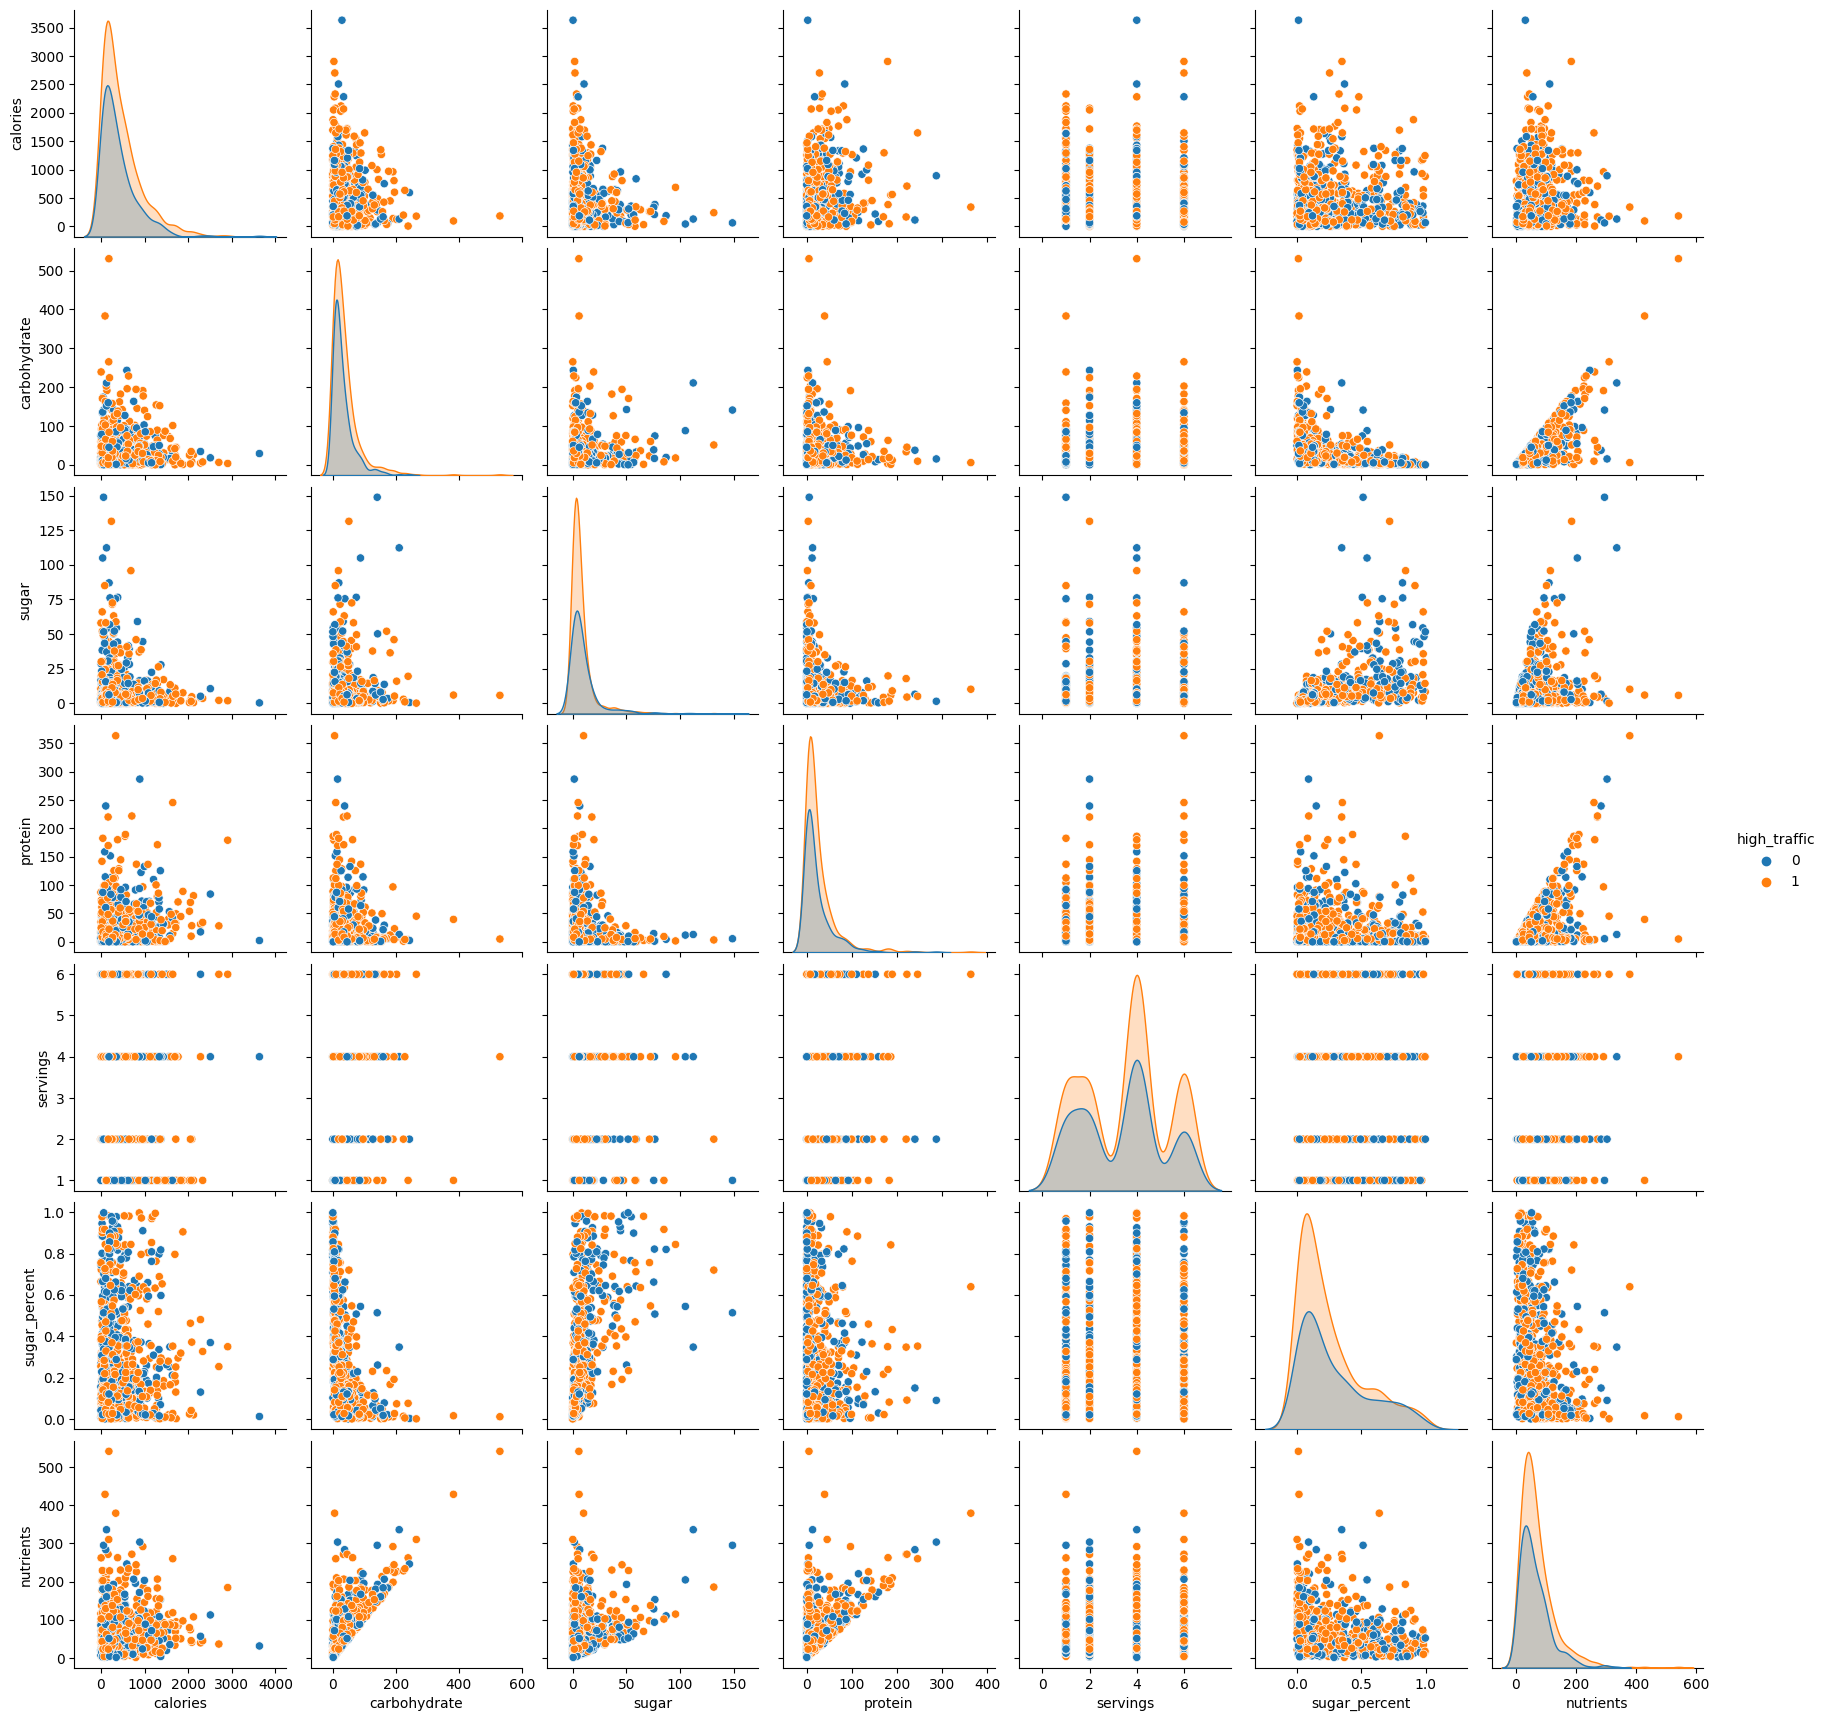

In [97]:
sns.pairplot(data = data_imputed, hue = 'high_traffic')

In [98]:
# data_imputed['category'] = data_imputed['category'].replace({'Pork':'Meat',
#                                                             #'Chicken':'Meat',
#                                                             'Potato':'Vegetable'})



data_imputed = pd.get_dummies(data_imputed, columns = ['category'], drop_first = True)
data_imputed.head()

,calories,carbohydrate,sugar,protein,servings,high_traffic,sugar_percent,nutrients,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
0,853.125,34.135,9.8775,53.70,6,1,0.224425,97.7125,0,0,0,0,0,0,1,0,0
1,35.480,38.560,0.6600,0.92,4,1,0.016828,40.1400,0,0,0,0,0,0,0,1,0
2,914.280,42.680,3.0900,2.88,1,0,0.067511,48.6500,1,0,0,0,0,0,0,0,0
3,97.030,30.560,38.6300,0.02,4,1,0.558318,69.2100,0,0,0,0,0,0,0,0,0
4,27.050,1.850,0.8000,0.53,4,0,0.301887,3.1800,0,0,0,0,0,0,0,0,0


In [99]:
# def logscale(column):
#     return np.log(column)

# data_imputed['cal_per_serving_log'] = np.log(data_imputed['cal_per_serving'])
# data_imputed['carb_per_serving_log'] = np.log(data_imputed['carb_per_serving'])
# data_imputed['sugar_per_serving_log'] = np.log(data_imputed['sugar_per_serving'])
# data_imputed['protein_per_serving_log'] = np.log(data_imputed['protein_per_serving'])
# data_imputed = data_imputed.drop(columns = ['cal_per_serving','carb_per_serving','sugar_per_serving','protein_per_serving'])
# data_imputed.head()

In [100]:
data_imputed.head()

,calories,carbohydrate,sugar,protein,servings,high_traffic,sugar_percent,nutrients,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
0,853.125,34.135,9.8775,53.70,6,1,0.224425,97.7125,0,0,0,0,0,0,1,0,0
1,35.480,38.560,0.6600,0.92,4,1,0.016828,40.1400,0,0,0,0,0,0,0,1,0
2,914.280,42.680,3.0900,2.88,1,0,0.067511,48.6500,1,0,0,0,0,0,0,0,0
3,97.030,30.560,38.6300,0.02,4,1,0.558318,69.2100,0,0,0,0,0,0,0,0,0
4,27.050,1.850,0.8000,0.53,4,0,0.301887,3.1800,0,0,0,0,0,0,0,0,0


In [101]:
# fig, ax = plt.subplots(nrows = 2, ncols = 2,figsize = (15,5))
# ax0 = sns.histplot(data = data_imputed, x = 'cal_per_serving_log', hue = 'high_traffic', multiple = 'dodge' , ax = ax[0][0])
# ax1 = sns.histplot(data = data_imputed, x = 'carb_per_serving_log', hue = 'high_traffic', multiple = 'dodge' , ax = ax[0,1])
# ax2 = sns.histplot(data = data_imputed, x = 'sugar_per_serving_log', hue = 'high_traffic', multiple = 'dodge' , ax = ax[1][0])
# ax3 = sns.histplot(data = data_imputed, x = 'protein_per_serving_log', hue = 'high_traffic', multiple = 'dodge' , ax = ax[1][1])
# fig.tight_layout()
# plt.show()

In [102]:
y = data_imputed['high_traffic']
X = data_imputed.drop(['high_traffic'] , axis = 1)


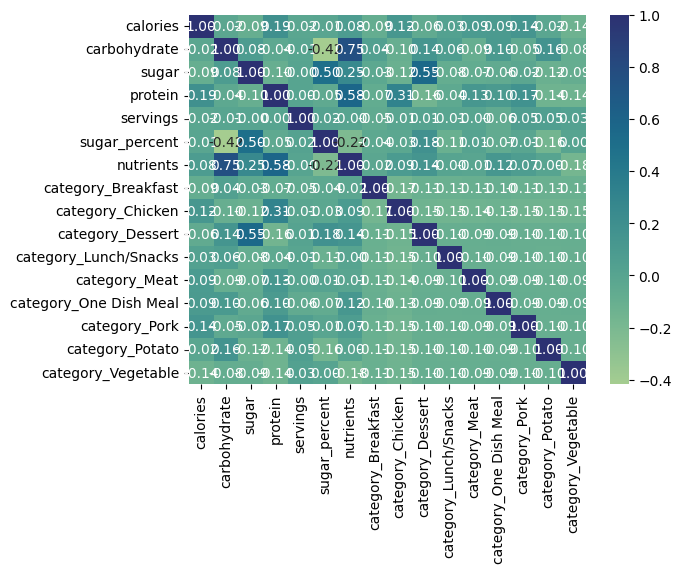

In [103]:
corrs = X.corr()

cm = sns.heatmap(corrs , annot = True , fmt = '.2f', cmap = 'crest')

plt.show()

In [104]:
data_imputed.head()

,calories,carbohydrate,sugar,protein,servings,high_traffic,sugar_percent,nutrients,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
0,853.125,34.135,9.8775,53.70,6,1,0.224425,97.7125,0,0,0,0,0,0,1,0,0
1,35.480,38.560,0.6600,0.92,4,1,0.016828,40.1400,0,0,0,0,0,0,0,1,0
2,914.280,42.680,3.0900,2.88,1,0,0.067511,48.6500,1,0,0,0,0,0,0,0,0
3,97.030,30.560,38.6300,0.02,4,1,0.558318,69.2100,0,0,0,0,0,0,0,0,0
4,27.050,1.850,0.8000,0.53,4,0,0.301887,3.1800,0,0,0,0,0,0,0,0,0


In [105]:
# data_imputed['cal_bin'] = data_imputed['cal_bin'].astype('int64')
# data_imputed['carb_bin'] = data_imputed['carb_bin'].astype('int64')
# data_imputed['sug_bin'] = data_imputed['sug_bin'].astype('int64')
# data_imputed['prot_bin'] = data_imputed['prot_bin'].astype('int64')
# data_imputed.info()

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler, PowerTransformer, MinMaxScaler, StandardScaler
from xgboost import XGBClassifier, plot_importance

In [136]:
#dividing a dataset on train|val|test sets in the proportion : 0.6|0.2|0.2
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , stratify = y, random_state = 42)
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.25 , stratify = y_train, random_state = 42)

# X_train[['cal_per_serving','carb_per_serving','sugar_per_serving','protein_per_serving']] =scalerPT.fit_transform(X_train[['cal_per_serving','carb_per_serving','sugar_per_serving','protein_per_serving']])
# X_test[['cal_per_serving','carb_per_serving','sugar_per_serving','protein_per_serving']] =scalerPT.transform(X_test[['cal_per_serving','carb_per_serving','sugar_per_serving','protein_per_serving']])

X_train.shape, X_test.shape

((757, 16), (190, 16))

In [137]:
scalerPT = RobustScaler()
X_train[['calories','sugar','carbohydrate','protein','sugar_percent','nutrients']] =scalerPT.fit_transform(X_train[['calories','sugar','carbohydrate','protein','sugar_percent','nutrients']])
X_test[['calories','sugar','carbohydrate','protein','sugar_percent','nutrients']] =scalerPT.transform(X_test[['calories','sugar','carbohydrate','protein','sugar_percent','nutrients']])



In [138]:
X_train.describe()

,calories,carbohydrate,sugar,protein,servings,sugar_percent,nutrients,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.00000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,0.285184,0.354285,0.553667,0.466800,3.455746,0.283226,0.278979,0.104359,0.18362,0.085865,0.095112,0.087186,0.075297,0.093791,0.104359,0.081902
std,0.909939,1.252999,1.805385,1.323269,1.732726,0.793731,0.991365,0.305928,0.38743,0.280350,0.293564,0.282294,0.264045,0.291731,0.305928,0.274397
min,-0.623747,-0.660006,-0.555999,-0.428725,1.000000,-0.532574,-0.880985,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.391184,-0.392007,-0.344891,-0.304083,2.000000,-0.341287,-0.379424,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.608816,0.607993,0.655109,0.695917,4.000000,0.658713,0.620576,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.904950,14.925360,17.699908,12.585602,6.000000,2.507083,8.478314,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


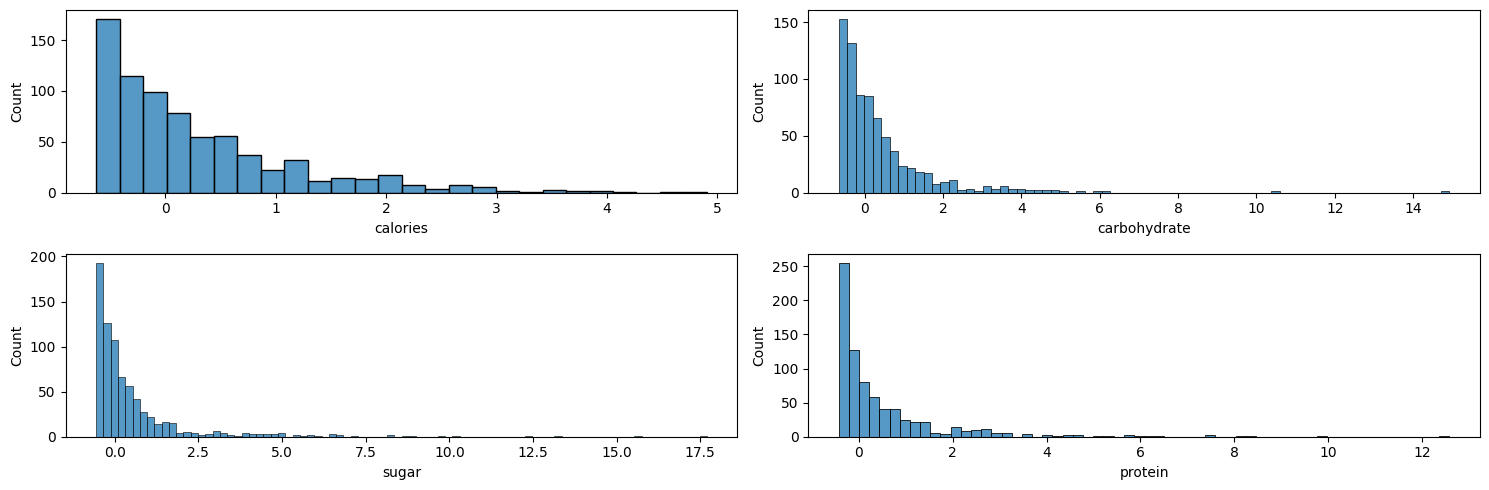

In [139]:
fig, ax = plt.subplots(nrows = 2, ncols = 2,figsize = (15,5))
ax0 = sns.histplot(data = X_train, x = 'calories', multiple = 'dodge' , ax = ax[0][0])

ax1 = sns.histplot(data = X_train, x = 'carbohydrate', multiple = 'dodge' , ax = ax[0,1])

ax2 = sns.histplot(data = X_train, x = 'sugar', multiple = 'dodge' , ax = ax[1][0])

ax3 = sns.histplot(data = X_train, x = 'protein', multiple = 'dodge' , ax = ax[1][1])

fig.tight_layout()
plt.show()

In [140]:
svc = SVC()
svc_params = {'C': np.arange(10,200,10), 
              'gamma': np.arange(0.0005,0.003,0.0005),
              #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] 
             } 
svc_opt = GridSearchCV(estimator = svc, param_grid = svc_params, n_jobs = -1, cv=10 , scoring = 'f1', refit = True)


knn = KNeighborsClassifier()
knn_params = { 'n_neighbors' : np.arange(10,30,2),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
#knn_params = { 'n_neighbors' : np.arange(2,15,1)}
knn_opt = GridSearchCV(estimator = knn, param_grid = knn_params, n_jobs = -1, cv = 10,scoring = 'f1', refit = True)


dt = DecisionTreeClassifier()
dt_params = {'min_samples_leaf': [1, 2, 3,4,5],
             'max_depth': [ 2,3,4, 5, 6,10],
             'class_weight': [None,'balanced']}

dt_opt = GridSearchCV(estimator = dt, param_grid = dt_params, n_jobs = -1, cv = 10,scoring = 'f1', refit = True)


logreg = LogisticRegression()
logreg_params =     {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(1, 10, 20),
    'solver' : ['liblinear'],
    'max_iter' : [10000,12500, 15000],
    'warm_start': [True, False]
    }
logreg_opt = GridSearchCV(estimator = logreg, param_grid = logreg_params, cv = 10, n_jobs = -1,scoring = 'f1', refit = True)


rf = RandomForestClassifier()
rf_params={
    'max_depth': [2,3,4],
    'n_estimators': np.arange(50,301,50),
    'criterion': ['gini','entropy','log_loss'],
    'max_features': np.arange(0.1,1,0.3),
    'max_samples': [0.3,0.5,0.8]}              
rf_opt = GridSearchCV(estimator = rf, param_grid = rf_params, cv = 10, n_jobs = -1,scoring = 'f1', refit = True)


bc = BaggingClassifier(n_jobs = -1)
bc_params = {
    'max_samples' : np.linspace(0.2,1,5),
    'max_features' : np.linspace(0.2,1,5),
    'n_estimators' :np.arange(20,50,10)}
bc_opt = GridSearchCV(estimator = bc, param_grid = bc_params, cv = 10, n_jobs = -1,scoring = 'f1', refit = True)


ag = AdaBoostClassifier()
ag_params = {
    'n_estimators' :np.arange(60,200,20),
    'learning_rate': [0.05, 0.1, 0.15,0.5,1] } 
ag_opt = GridSearchCV(estimator = ag, param_grid = ag_params, cv = 10, n_jobs = -1,scoring = 'f1', refit = True)


sgbt = GradientBoostingClassifier()
sgbt_params = { 
    'max_depth': [2,3,4],
    'n_estimators' :np.arange(60,200,20),
    'subsample': np.arange(0.5,0.8,0.1) ,
    'max_features': np.arange(0.1,0.4,0.1)} 
sgbt_opt = GridSearchCV(estimator = sgbt, param_grid = sgbt_params, cv = 10, n_jobs = -1,scoring = 'f1', refit = True)

xgb = XGBClassifier(objective='binary:logistic',random_state = 42)
xgb_params = {'max_depth': [1,3,5,9,13], 
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 150, 200,300],
             'subsample': [0.5, 0.75, 0.8]
             }    
xgb_opt = GridSearchCV(xgb , param_grid = xgb_params, cv = 10, scoring = 'f1', n_jobs = -1, refit = True)

In [141]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [142]:

#models = [svc_opt, knn_opt, dt_opt, logreg_opt, rf_opt,bc_opt,ag_opt,sgbt_opt,xgb_opt]
model_list = [('svc_opt',svc_opt),
              ('kkn_opt',knn_opt),
              ('dt_opt', dt_opt),
              ('logreg_opt',logreg_opt),
              ('rf_opt',rf_opt),
              ('bc_opt',bc_opt),
              ('ag_opt',ag_opt),
              ('sgbt_opt',sgbt_opt),
              ('xgb_opt',xgb_opt)]

# model_list = [
#               ('knn_opt',knn_opt),
#               ('dt_opt', dt_opt),
#               ('logreg_opt',logreg_opt),
#               ('rf_opt',rf_opt),
#               ('bc_opt',bc_opt),
#               ('ag_opt',ag_opt),
#               ('sgbt_opt',sgbt_opt),
#               ('xgb_opt',xgb_opt)]
table = pd.DataFrame()
best_models = []
scores = pd.DataFrame()
surv = pd.Series([0]*len(y_test.index), index = y_test.index)#pd.Series(dtype = int ,index = y_test.index)#[[],index = y_test.index]
for model in model_list:
    model[1].fit(X_train,y_train)
    best_models.append(model[1].best_estimator_)
    y_pred = model[1].best_estimator_.predict(X_test)
    surv = surv.add(y)
    y_pred_train= model[1].best_estimator_.predict(X_train)
    acc = accuracy_score(y_test,y_pred)
    acc_train = accuracy_score(y_train,y_pred_train)
    

    scores = scores.append(get_scores(model[0],model[1], X_test, y_test) )
    
    print( f'{model[1].best_estimator_}' + 'completed')
    print(acc_train)
    print(acc)
    print('\n')

scores

/home/cra9hack/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/cra9hack/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/cra9hack/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/cra9hack/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy vers

SVC(C=190, gamma=0.0025)completed
0.7635402906208718
0.7789473684210526


KNeighborsClassifier(metric='manhattan', n_neighbors=14, weights='distance')completed
1.0
0.7


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)completed
0.7239101717305152
0.7631578947368421


LogisticRegression(C=10.0, max_iter=10000, solver='liblinear', warm_start=True)completed
0.7635402906208718
0.7684210526315789


RandomForestClassifier(max_depth=3, max_features=0.4, max_samples=0.8,
                       n_estimators=50)completed
0.750330250990753
0.7631578947368421


BaggingClassifier(max_samples=0.6000000000000001, n_estimators=30, n_jobs=-1)completed
0.9709379128137384
0.7631578947368421


AdaBoostClassifier(learning_rate=0.05, n_estimators=80)completed
0.7199471598414795
0.7631578947368421


GradientBoostingClassifier(max_depth=2, max_features=0.1, n_estimators=80,
                           subsample=0.7)completed
0.7886393659180978
0.7263157894736842


XGBClassifier(base_score=None, booster=

,model,precision,recall,f1,accuracy,AUC
0,svc_opt,0.847619,0.773913,0.809091,0.778947,0.780290
0,kkn_opt,0.768519,0.721739,0.744395,0.700000,0.694203
0,dt_opt,0.757353,0.895652,0.820717,0.763158,0.727826
0,logreg_opt,0.838095,0.765217,0.800000,0.768421,0.769275
0,rf_opt,0.773438,0.860870,0.814815,0.763158,0.737101
0,bc_opt,0.843137,0.747826,0.792627,0.763158,0.767246
0,ag_opt,0.757353,0.895652,0.820717,0.763158,0.727826
0,sgbt_opt,0.788991,0.747826,0.767857,0.726316,0.720580
0,xgb_opt,0.843137,0.747826,0.792627,0.763158,0.767246


In [236]:
y_diff = np.abs(y_test - y_pred) > 0
X_test[y_diff]

,calories,carbohydrate,sugar,protein,servings_2,servings_4,servings_6,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
32,347,9,5,82,0,1,0,0,1,0,0,0,0,0,0,0
664,1056,38,4,46,0,1,0,0,1,0,0,0,0,0,0,0
583,268,12,6,78,0,1,0,0,1,0,0,0,0,0,0,0
470,1272,3,0,25,0,0,0,0,1,0,0,0,0,0,0,0
643,561,18,11,5,0,1,0,0,0,1,0,0,0,0,0,0
469,751,163,13,29,0,0,1,0,0,0,1,0,0,0,0,0
57,191,9,0,66,0,0,0,0,1,0,0,0,0,0,0,0
893,877,48,7,47,0,1,0,0,0,0,0,0,1,0,0,0
189,529,23,2,15,0,0,0,1,0,0,0,0,0,0,0,0
497,350,73,17,1,0,1,0,0,0,1,0,0,0,0,0,0


In [791]:
# model_list = [('svc_opt',svc_opt),
#               ('kkn_opt',knn_opt),
#               ('dt_opt', dt_opt),
#               ('logreg_opt',logreg_opt),
#               ('rf_opt',rf_opt),
#               ('bc_opt',bc_opt),
#               ('ag_opt',ag_opt),
#               ('sgbt_opt',sgbt_opt),
#               ('xgb_opt',xgb_opt)]
# scores = pd.DataFrame()
# for model in model_list:
#     scores = scores.append(get_scores(model[0],model[1], X_test, y_test) )

# scores  

In [1069]:
scores_perserving_allcats

In [1070]:
scores_perserving_changedcats 

In [1117]:
scores_noperserving_changedcats 
scores_noperserving_changedcats

,model,precision,recall,f1,accuracy,AUC
0,svc_opt,0.760870,0.913043,0.830040,0.773684,0.736522
0,kkn_opt,0.700000,0.791304,0.742857,0.668421,0.635652
0,dt_opt,0.775194,0.869565,0.819672,0.768421,0.741449
0,logreg_opt,0.760870,0.913043,0.830040,0.773684,0.736522
0,rf_opt,0.772727,0.886957,0.825911,0.773684,0.743478
0,bc_opt,0.785714,0.765217,0.775330,0.731579,0.722609
0,ag_opt,0.778626,0.886957,0.829268,0.778947,0.750145
0,sgbt_opt,0.770992,0.878261,0.821138,0.768421,0.739130
0,xgb_opt,0.778626,0.886957,0.829268,0.778947,0.750145


In [1163]:
scores_noperserving_allcats = scores

In [1165]:
pd.set_option('display.max_columns', None)
pd.concat([scores_perserving_allcats, scores_perserving_changedcats,scores_noperserving_changedcats,scores_noperserving_allcats], keys=['scores_perserving_allcats', 'scores_perserving_changedcats','scores_noperserving_changedcats','scores_noperserving_allcats'], axis=1)

scores_perserving_allcats                                                    \
                      model precision    recall        f1  accuracy       AUC   
0                   svc_opt  0.847619  0.773913  0.809091  0.778947  0.780290   
0                   kkn_opt  0.728814  0.747826  0.738197  0.678947  0.660580   
0                    dt_opt  0.773109  0.800000  0.786325  0.736842  0.720000   
0                logreg_opt  0.847619  0.773913  0.809091  0.778947  0.780290   
0                    rf_opt  0.758333  0.791304  0.774468  0.721053  0.702319   
0                    bc_opt  0.831776  0.773913  0.801802  0.768421  0.766957   
0                    ag_opt  0.787037  0.739130  0.762332  0.721053  0.716232   
0                  sgbt_opt  0.788991  0.747826  0.767857  0.726316  0.720580   
0                   xgb_opt  0.781818  0.747826  0.764444  0.721053  0.713913   

  scores_perserving_changedcats                                          \
                          model precision    recall        f1  accuracy   
0                       svc_opt  0.760870  0.913043  0.830040  0.773684   
0                       kkn_opt  0.725664  0.713043  0.719298  0.663158   
0                        dt_opt  0.744526  0.886957  0.809524  0.747368   
0                    logreg_opt  0.760870  0.913043  0.830040  0.773684   
0                        rf_opt  0.742647  0.878261  0.804781  0.742105   
0                        bc_opt  0.767857  0.747826  0.757709  0.710526   
0                        ag_opt  0.742647  0.878261  0.804781  0.742105   
0                      sgbt_opt  0.740458  0.843478  0.788618  0.726316   
0                       xgb_opt  0.761194  0.886957  0.819277  0.763158   

            scores_noperserving_changedcats                                \
        AUC                           model precision    recall        f1   
0  0.736522                         svc_opt  0.760870  0.913043  0.830040   
0  0.649855                         kkn_opt  0.700000  0.791304  0.742857   
0  0.710145                          dt_opt  0.775194  0.869565  0.819672   
0  0.736522                      logreg_opt  0.760870  0.913043  0.830040   
0  0.705797                          rf_opt  0.772727  0.886957  0.825911   
0  0.700580                          bc_opt  0.785714  0.765217  0.775330   
0  0.705797                          ag_opt  0.778626  0.886957  0.829268   
0  0.695072                        sgbt_opt  0.770992  0.878261  0.821138   
0  0.730145                         xgb_opt  0.778626  0.886957  0.829268   

                      scores_noperserving_allcats                      \
   accuracy       AUC                       model precision    recall   
0  0.773684  0.736522                     svc_opt  0.847619  0.773913   
0  0.668421  0.635652                     kkn_opt  0.700000  0.730435   
0  0.768421  0.741449                      dt_opt  0.809524  0.739130   
0  0.773684  0.736522                  logreg_opt  0.847619  0.773913   
0  0.773684  0.743478                      rf_opt  0.807018  0.800000   
0  0.731579  0.722609                      bc_opt  0.790476  0.721739   
0  0.778947  0.750145                      ag_opt  0.807339  0.765217   
0  0.768421  0.739130                    sgbt_opt  0.836735  0.713043   
0  0.778947  0.750145                     xgb_opt  0.800000  0.765217   

                                 
         f1  accuracy       AUC  
0  0.809091  0.778947  0.780290  
0  0.714894  0.647368  0.625217  
0  0.772727  0.736842  0.736232  
0  0.809091  0.778947  0.780290  
0  0.803493  0.763158  0.753333  
0  0.754545  0.715789  0.714203  
0  0.785714  0.747368  0.742609  
0  0.769953  0.742105  0.749855  
0  0.782222  0.742105  0.735942

In [89]:
old = scores
old

,model,precision,recall,f1,accuracy,AUC
0,svc_opt,0.852632,0.757009,0.801980,0.776536,0.781282
0,kkn_opt,0.707071,0.654206,0.679612,0.631285,0.625714
0,dt_opt,0.810526,0.719626,0.762376,0.731844,0.734813
0,logreg_opt,0.852632,0.757009,0.801980,0.776536,0.781282
0,rf_opt,0.795918,0.728972,0.760976,0.726257,0.725597
0,bc_opt,0.789474,0.700935,0.742574,0.709497,0.711578
0,ag_opt,0.800000,0.710280,0.752475,0.720670,0.723196
0,sgbt_opt,0.819149,0.719626,0.766169,0.737430,0.741758
0,xgb_opt,0.804348,0.691589,0.743719,0.715084,0.720794


In [93]:
pd.concat([old, scores], keys=['old', 'scores'], axis=1)

old                                                        scores  \
        model precision    recall        f1  accuracy       AUC       model   
0     svc_opt  0.852632  0.757009  0.801980  0.776536  0.781282     svc_opt   
0     kkn_opt  0.707071  0.654206  0.679612  0.631285  0.625714     kkn_opt   
0      dt_opt  0.810526  0.719626  0.762376  0.731844  0.734813      dt_opt   
0  logreg_opt  0.852632  0.757009  0.801980  0.776536  0.781282  logreg_opt   
0      rf_opt  0.795918  0.728972  0.760976  0.726257  0.725597      rf_opt   
0      bc_opt  0.789474  0.700935  0.742574  0.709497  0.711578      bc_opt   
0      ag_opt  0.800000  0.710280  0.752475  0.720670  0.723196      ag_opt   
0    sgbt_opt  0.819149  0.719626  0.766169  0.737430  0.741758    sgbt_opt   
0     xgb_opt  0.804348  0.691589  0.743719  0.715084  0.720794     xgb_opt   

                                                     
  precision    recall        f1  accuracy       AUC  
0  0.852632  0.757009  0.801980  0.776536  0.781282  
0  0.707071  0.654206  0.679612  0.631285  0.625714  
0  0.810526  0.719626  0.762376  0.731844  0.734813  
0  0.852632  0.757009  0.801980  0.776536  0.781282  
0  0.795918  0.728972  0.760976  0.726257  0.725597  
0  0.789474  0.700935  0.742574  0.709497  0.711578  
0  0.800000  0.710280  0.752475  0.720670  0.723196  
0  0.800000  0.710280  0.752475  0.720670  0.723196  
0  0.804348  0.691589  0.743719  0.715084  0.720794